# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
cities_df=pd.DataFrame({"City":cities})

In [7]:
cities_df.head()

,City
0,udachnyy
1,eureka
2,dingle
3,cabo san lucas
4,avarua


In [8]:
cities_df["Cloudiness"]=""
cities_df["Country"]=""
cities_df["Date"]=""
cities_df["Humidity"]=""
cities_df["Lat"]=""
cities_df["Lng"]=""
cities_df["Max Temp"]=""
cities_df["Wind Speed"]=""
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,udachnyy,,,,,,,,
1,eureka,,,,,,,,
2,dingle,,,,,,,,
3,cabo san lucas,,,,,,,,
4,avarua,,,,,,,,


In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?"
params = {"appid":weather_api_key,
         "units":"metric"
         }

responses = []
params
for city, row in cities_df.iterrows():
    params["q"] = {row["City"]}
    response = requests.get(url,params=params).json()
    responses.append(response)

In [10]:
print(responses)


[{'coord': {'lon': 112.4, 'lat': 66.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -13, 'feels_like': -19.22, 'temp_min': -13, 'temp_max': -13, 'pressure': 1017, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 270}, 'clouds': {'all': 0}, 'dt': 1603601764, 'sys': {'type': 1, 'id': 8846, 'country': 'RU', 'sunrise': 1603584172, 'sunset': 1603614349}, 'timezone': 32400, 'id': 2014624, 'name': 'Udachny', 'cod': 200}, {'coord': {'lon': -124.16, 'lat': 40.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 9.39, 'feels_like': 8.18, 'temp_min': 8.89, 'temp_max': 10, 'pressure': 1015, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 0.84, 'deg': 17}, 'clouds': {'all': 6}, 'dt': 1603601540, 'sys': {'type': 3, 'id': 2007742, 'country': 'US', 'sunrise': 1603550307, 'sunset': 1603588967}, 'timezone': -25200, 'id': 556339

In [11]:
    
print("""Begining Data Retrival
--------------------------------------""")

for x,row in cities_df.iterrows():
    try:
        cities_df.loc[x,"Cloudiness"]=responses[x]['clouds']['all']
        cities_df.loc[x,"Country"]=responses[x]['sys']['country']
        cities_df.loc[x,"Date"]=responses[x]['dt']
        cities_df.loc[x,"Humidity"]=responses[x]['main']['humidity']
        cities_df.loc[x,"Lat"]=responses[x]['coord']['lat']
        cities_df.loc[x,"Lng"]=responses[x]['coord']['lon']
        cities_df.loc[x,"Max Temp"]=responses[x]['main']['temp_max']
        cities_df.loc[x,"Wind Speed"]=responses[x]['wind']['speed']
        print(f"Processing Record {x+1} | {responses[x]['name']}")
        
    except:
        print(f"City not found. Skipping...")
        
        
        

Begining Data Retrival
--------------------------------------
Processing Record 1 | Udachny
Processing Record 2 | Eureka
Processing Record 3 | Dingle
Processing Record 4 | Cabo San Lucas
Processing Record 5 | Avarua
Processing Record 6 | Leningradskiy
Processing Record 7 | Saint-Philippe
Processing Record 8 | Hithadhoo
Processing Record 9 | Viedma
Processing Record 10 | Bredasdorp
Processing Record 11 | Punta Arenas
Processing Record 12 | Fairbanks
Processing Record 13 | Ushuaia
Processing Record 14 | Butaritari
City not found. Skipping...
Processing Record 16 | Olinda
Processing Record 17 | Springbok
Processing Record 18 | Hermanus
Processing Record 19 | Albany
City not found. Skipping...
Processing Record 21 | Ponta do Sol
Processing Record 22 | Mataura
Processing Record 23 | Port Lincoln
Processing Record 24 | Cedar City
Processing Record 25 | Yenotayevka
Processing Record 26 | Hobart
Processing Record 27 | Mount Gambier
Processing Record 28 | Bluff
Processing Record 29 | Mosquera
P

Processing Record 302 | Karratha
Processing Record 303 | Prachin Buri
Processing Record 304 | Dikson
Processing Record 305 | Kungurtug
Processing Record 306 | Tigil'
Processing Record 307 | Ribeira Grande
City not found. Skipping...
Processing Record 309 | Morondava
Processing Record 310 | Podlesnoye
Processing Record 311 | Atyrau
Processing Record 312 | Goderich
Processing Record 313 | Aden
City not found. Skipping...
Processing Record 315 | Kalmunai
Processing Record 316 | Heraclea
Processing Record 317 | Arlit
Processing Record 318 | La Paz
Processing Record 319 | Yar-Sale
Processing Record 320 | Chardara
Processing Record 321 | Pangkalanbuun
Processing Record 322 | Swellendam
Processing Record 323 | Paita
Processing Record 324 | Abonnema
Processing Record 325 | Aykhal
Processing Record 326 | Hakkâri Province
Processing Record 327 | Mariehamn
Processing Record 328 | Isangel
Processing Record 329 | San Patricio
Processing Record 330 | Lanxi
City not found. Skipping...
Processing Reco

Processing Record 559 | Denpasar
Processing Record 560 | Shakiso
Processing Record 561 | Arona
Processing Record 562 | Sítio Novo do Tocantins
Processing Record 563 | Te Anau
City not found. Skipping...
Processing Record 565 | Mutoko
City not found. Skipping...
Processing Record 567 | Laguna
City not found. Skipping...
Processing Record 569 | Sakaiminato
City not found. Skipping...
Processing Record 571 | Province of Groningen
Processing Record 572 | Kantang
Processing Record 573 | Zhicheng
Processing Record 574 | Gamba
Processing Record 575 | Niquero
Processing Record 576 | Dolores Hidalgo Cuna de la Independencia Nacional
Processing Record 577 | Guarapari
Processing Record 578 | Ixtapa
Processing Record 579 | Coldwater
Processing Record 580 | Palana
Processing Record 581 | Marsá Maţrūḩ
Processing Record 582 | Alta Floresta
Processing Record 583 | Abay
Processing Record 584 | Muli
Processing Record 585 | Yakovlevskoye
Processing Record 586 | Christiana
Processing Record 587 | Paranhos

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
nan_value = float("NaN")
cities_df.replace("", nan_value, inplace=True)
cities_df.dropna(subset = ["Cloudiness"], inplace=True)

In [13]:
cities_df.shape

(551, 9)

In [14]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,udachnyy,0.0,RU,1.603602e+09,78.0,66.42,112.40,-13.00,4.00
1,eureka,6.0,US,1.603602e+09,87.0,40.80,-124.16,10.00,0.84
2,dingle,100.0,PH,1.603602e+09,90.0,11.00,122.67,25.64,0.53
3,cabo san lucas,0.0,MX,1.603602e+09,82.0,22.89,-109.91,27.22,5.67
4,avarua,56.0,CK,1.603602e+09,69.0,-21.21,-159.78,24.00,6.20


In [15]:
cities_df.to_csv(r'../output_data/cities.csv')


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

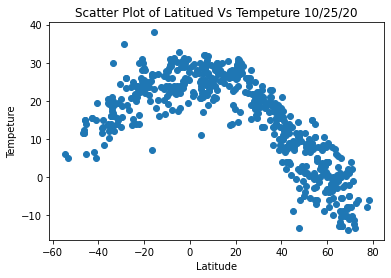

This graph shows a clear tendency of higher tempeture as latitud approximates to ecuator which resides at latitud cero '0'


In [37]:
plt.scatter(cities_df["Lat"], cities_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Tempeture")
plt.title("Scatter Plot of Latitued Vs Tempeture 10/25/20")
plt.savefig(r'../output_data/fig1.png')
plt.show()
print("This graph shows a clear tendency of higher tempeture as latitud approximates to ecuator which resides at latitud cero '0'")

#### Latitude vs. Humidity Plot

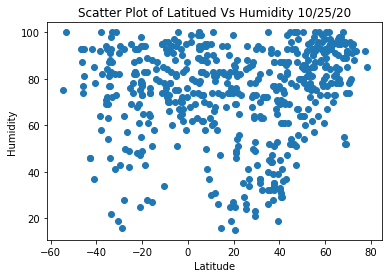

There is no clear correlation of Humidity levels with closiness with ecuator


In [38]:
plt.scatter(cities_df["Lat"], cities_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Scatter Plot of Latitued Vs Humidity 10/25/20")
plt.savefig(r'../output_data/fig2.png')
plt.show()
print("There is no clear correlation of Humidity levels with closiness with ecuator")

#### Latitude vs. Cloudiness Plot

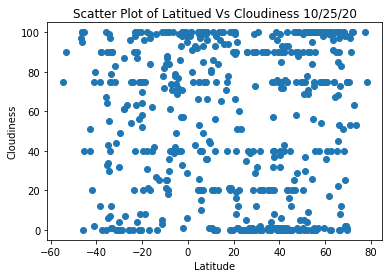

Again, no clear correlation of closiness to the ecuator with Cloudiness. Projects probable irrelevance of this variable to determine cloudiness of a City


In [39]:
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Scatter Plot of Latitued Vs Cloudiness 10/25/20")
plt.savefig(r'../output_data/fig3.png')
plt.show()
print("Again, no clear correlation of closiness to the ecuator with Cloudiness. Projects probable irrelevance of this variable to determine cloudiness of a City")

#### Latitude vs. Wind Speed Plot

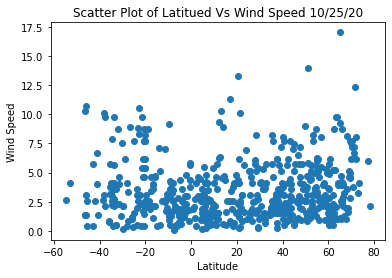

Again, no clear correlation of closiness to the ecuator with Cloudiness. Projects probable irrelevance of this variable to determine cloudiness of a City


In [40]:
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Scatter Plot of Latitued Vs Wind Speed 10/25/20")
plt.savefig(r'../output_data/fig4.png')
plt.show()
print("Again, no clear correlation of closiness to the ecuator with Cloudiness. Projects probable irrelevance of this variable to determine cloudiness of a City")

## Linear Regression

In [74]:
# OPTIONAL: Create a function to create Linear Regression plots
from scipy import stats

In [75]:
# Create Northern and Southern Hemisphere DataFrames
NH_df=cities_df.loc[cities_df["Lat"]>=0]
SH_df=cities_df.loc[cities_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression


r squared or Correlation value is: 0.7997809484904954 showing a Strong Correlation between the latitud and the Maximum Tempature on the northern hemisphere


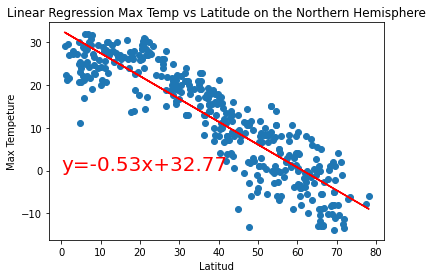

In [80]:
x_values=NH_df["Lat"]
y_values=NH_df["Max Temp"]
(slope,intercept,rvalue,pvale,stderr)=stats.linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y="+str(round(slope,2))+'x+'+str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r')
plt.xlabel('Latitud')
plt.ylabel('Max Tempeture')
plt.title('Linear Regression Max Temp vs Latitude on the Northern Hemisphere')
plt.annotate(line_eq,(0,0),fontsize=20,color='red')
print(f'r squared or Correlation value is: {rvalue**2} showing a Strong Correlation between the latitud and the Maximum Tempature on the northern hemisphere')
# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r squared or Correlation value is: 0.49314839149308903 showing a much lower Correlation between the latitud and the Maximum Tempature on the Southern hemisphere than in the North


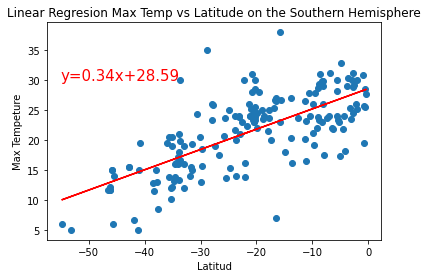

In [105]:
x_values=SH_df["Lat"]
y_values=SH_df["Max Temp"]
(slope,intercept,rvalue,pvale,stderr)=stats.linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y="+str(round(slope,2))+'x+'+str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r')
plt.xlabel('Latitud')
plt.ylabel('Max Tempeture')
plt.title('Linear Regresion Max Temp vs Latitude on the Southern Hemisphere')
plt.annotate(line_eq,(-55,30),fontsize=15,color='red')
print(f'r squared or Correlation value is: {rvalue**2} showing a much lower Correlation between the latitud and the Maximum Tempature on the Southern hemisphere than in the North')
# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r squared or Correlation value is: 0.06109555273013757 which represents no Correlation between the latitud and the Maximum Tempature on the northern hemisphere


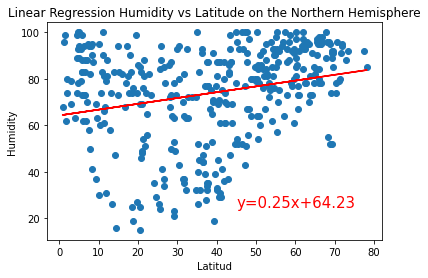

In [99]:
x_values=NH_df["Lat"]
y_values=NH_df["Humidity"]
(slope,intercept,rvalue,pvale,stderr)=stats.linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y="+str(round(slope,2))+'x+'+str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r')
plt.xlabel('Latitud')
plt.ylabel('Humidity')
plt.title('Linear Regression Humidity vs Latitude on the Northern Hemisphere')
plt.annotate(line_eq,(45,25),fontsize=15,color='red')
print(f'r squared or Correlation value is: {rvalue**2} which represents no Correlation between the latitud and the Maximum Tempature on the northern hemisphere')
# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r squared or Correlation value is: 0.0007378941038800926 showing no Correlation between the latitud and the Maximum Tempature on the Southern hemisphere than in the North


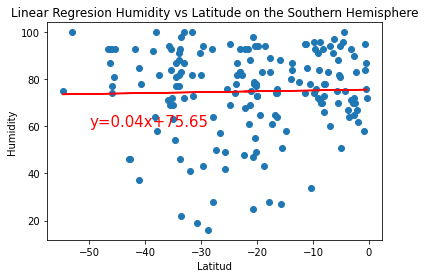

In [104]:
x_values=SH_df["Lat"]
y_values=SH_df["Humidity"]
(slope,intercept,rvalue,pvale,stderr)=stats.linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y="+str(round(slope,2))+'x+'+str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r')
plt.xlabel('Latitud')
plt.ylabel('Humidity')
plt.title('Linear Regresion Humidity vs Latitude on the Southern Hemisphere')
plt.annotate(line_eq,(-50,60),fontsize=15,color='red')
print(f'r squared or Correlation value is: {rvalue**2} showing no Correlation between the latitud and the Maximum Tempature on the Southern hemisphere than in the North')
# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r squared or Correlation value is: 0.007687710605610649 showing no Correlation between the latitud and the Maximum Tempature on the northern hemisphere


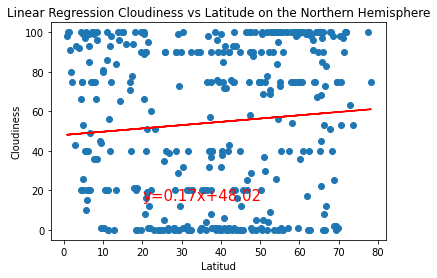

In [101]:
x_values=NH_df["Lat"]
y_values=NH_df["Cloudiness"]
(slope,intercept,rvalue,pvale,stderr)=stats.linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y="+str(round(slope,2))+'x+'+str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r')
plt.xlabel('Latitud')
plt.ylabel('Cloudiness')
plt.title('Linear Regression Cloudiness vs Latitude on the Northern Hemisphere')
plt.annotate(line_eq,(20,15),fontsize=15,color='red')
print(f'r squared or Correlation value is: {rvalue**2} showing no Correlation between the latitud and the Maximum Tempature on the northern hemisphere')
# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r squared or Correlation value is: 0.0033955698689904627 showing inexisting Correlation between the latitud and the Maximum Tempature on the Southern hemisphere than in the North


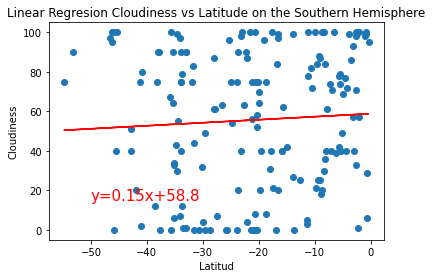

In [103]:
x_values=SH_df["Lat"]
y_values=SH_df["Cloudiness"]
(slope,intercept,rvalue,pvale,stderr)=stats.linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y="+str(round(slope,2))+'x+'+str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r')
plt.xlabel('Latitud')
plt.ylabel('Cloudiness')
plt.title('Linear Regresion Cloudiness vs Latitude on the Southern Hemisphere')
plt.annotate(line_eq,(-50,15),fontsize=15,color='red')
print(f'r squared or Correlation value is: {rvalue**2} showing inexisting Correlation between the latitud and the Maximum Tempature on the Southern hemisphere than in the North')
# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r squared or Correlation value is: 0.046928410651709725 not showing any Correlation between the latitud and the Maximum Tempature on the northern hemisphere


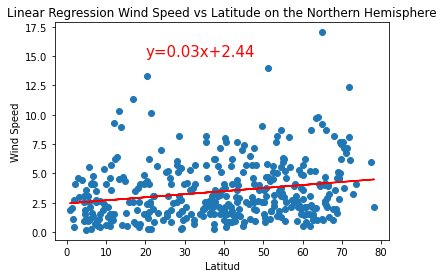

In [106]:
x_values=NH_df["Lat"]
y_values=NH_df["Wind Speed"]
(slope,intercept,rvalue,pvale,stderr)=stats.linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y="+str(round(slope,2))+'x+'+str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r')
plt.xlabel('Latitud')
plt.ylabel('Wind Speed')
plt.title('Linear Regression Wind Speed vs Latitude on the Northern Hemisphere')
plt.annotate(line_eq,(20,15),fontsize=15,color='red')
print(f'r squared or Correlation value is: {rvalue**2} not showing any Correlation between the latitud and the Maximum Tempature on the northern hemisphere')
# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r squared or Correlation value is: 0.026954376210684125 that represents no Correlation between the latitud and the Maximum Tempature on the Southern hemisphere than in the North


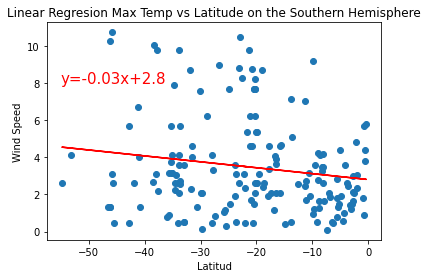

In [108]:
x_values=SH_df["Lat"]
y_values=SH_df["Wind Speed"]
(slope,intercept,rvalue,pvale,stderr)=stats.linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y="+str(round(slope,2))+'x+'+str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r')
plt.xlabel('Latitud')
plt.ylabel('Wind Speed')
plt.title('Linear Regresion Max Temp vs Latitude on the Southern Hemisphere')
plt.annotate(line_eq,(-55,8),fontsize=15,color='red')
print(f'r squared or Correlation value is: {rvalue**2} that represents no Correlation between the latitud and the Maximum Tempature on the Southern hemisphere than in the North')
# Show plot
plt.show()